In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

Loading the features Excel

In [3]:
df =pd.read_excel(r"D:\jio institute\q3\cv\final_project\analysis.xlsx")
df

,Subject no:,Left_eye_temperature(OST),Right_eye_temperature(OST),Absolute_Difference_OST,Left_eye_Cornea_temperature,Right_eye_Cornea_temperature,Absolute_Difference_cornea,Temperature_Deviation_along_Cornea,Dry_eye_label
0,1,32.76,32.75,0.01,32.9654,32.9689,0.0035,4.4,0
1,2,32.61,32.64,0.03,32.9900,32.9400,0.0500,4.5,1
2,3,32.55,32.57,0.02,32.9700,32.9800,0.0100,4.5,0
3,4,32.81,32.63,0.18,32.8700,32.2300,0.6400,5.3,1
4,5,32.72,32.64,0.08,32.9600,32.9500,0.0100,4.5,0
5,6,32.73,32.71,0.02,32.9600,32.9300,0.0300,4.4,0
6,7,32.91,32.87,0.04,32.9100,32.8900,0.0200,4.4,1
7,8,32.73,32.56,0.17,32.9100,32.3100,0.6000,5.4,0
8,9,32.61,32.51,0.10,32.9500,32.9700,0.0200,4.4,0
9,10,32.44,32.66,0.22,32.9200,32.9100,0.0100,4.5,1


# Feature 1 Absolute difference OST statistical analysis

Plotting the histogram for one feature

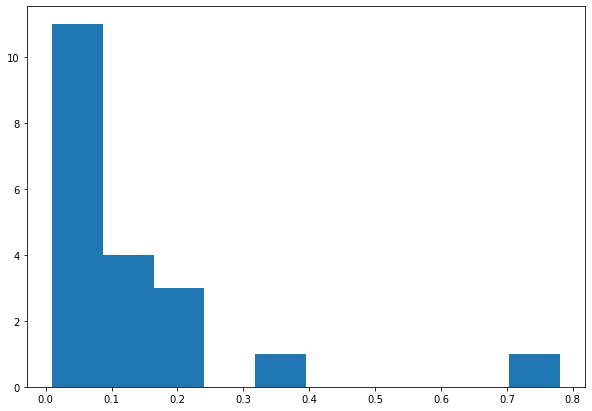

In [172]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df["Absolute_Difference_OST"])
 
# Show plot
plt.show()

In [173]:
df["Absolute_Difference_OST"].describe()

count    20.000000
mean      0.127500
std       0.174141
min       0.010000
25%       0.030000
50%       0.075000
75%       0.162500
max       0.780000
Name: Absolute_Difference_OST, dtype: float64

In [174]:
skew_kurt_dict={}
skew,kurtosis=stats.skew(df["Absolute_Difference_OST"]),stats.kurtosis(df["Absolute_Difference_OST"])
skew_kurt_dict["skew"]=skew
skew_kurt_dict["kurtosis"]=kurtosis
print(skew_kurt_dict)

{'skew': 2.843423960392401, 'kurtosis': 8.081249574554887}


The mean and standard deviation are of almost similar, so we can follow exponential distribution for data augmentation

# Feature 2 Absolute difference Cornea statistical analysis

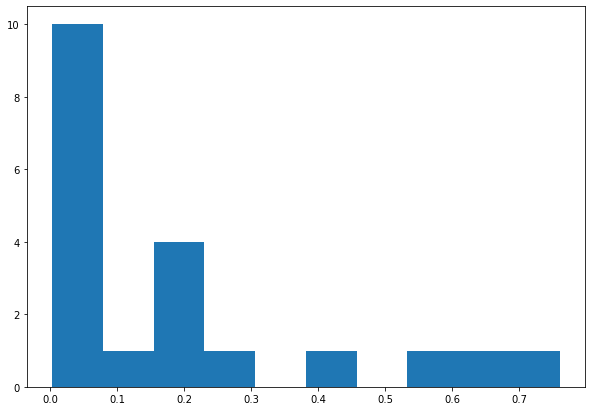

In [175]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df["Absolute_Difference_cornea"])
 
# Show plot
plt.show()

In [176]:
df["Absolute_Difference_cornea"].describe()

count    20.000000
mean      0.190175
std       0.234238
min       0.003500
25%       0.020000
50%       0.080000
75%       0.240000
max       0.760000
Name: Absolute_Difference_cornea, dtype: float64

# Feature 3 Temperature Deviation along Cornea statistical analysis

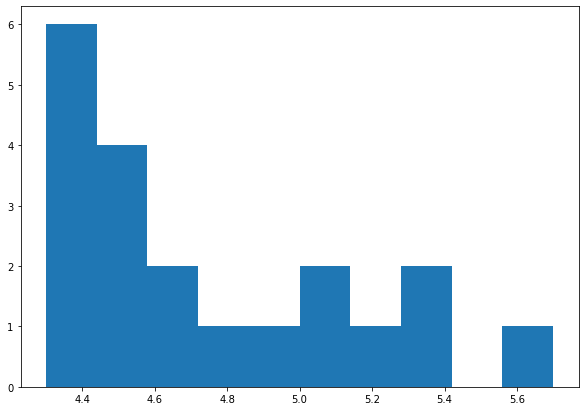

In [177]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df["Temperature_Deviation_along_Cornea"])
 
# Show plot
plt.show()

# Model Building

In [4]:
X=df.drop(["Left_eye_temperature(OST)","Right_eye_temperature(OST)","Left_eye_Cornea_temperature","Right_eye_Cornea_temperature"],axis=1)
y=df["Dry_eye_label"]

Test Train split

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.2, 
                                   shuffle=True)

Standard scaler

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled_columns  = scaler.fit_transform(X_train) 
train_x=scaler.fit_transform(X_train)
test_x=scaler.fit_transform(X_test)

**Logistic Regression**

In [7]:
model = LogisticRegression(solver='lbfgs').fit(test_x,y_test)

In [8]:
confusion_matrix(y_test, model.predict(test_x))

array([[3, 0],
       [0, 1]], dtype=int64)

In [9]:
print(classification_report(y_test, model.predict(test_x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



**Support Vector Machines**

In [10]:
from sklearn.svm import SVC  
clf = SVC(kernel='linear') 

In [11]:
model=clf.fit(train_x, y_train)

In [12]:
pred=model.predict(test_x)

In [13]:
confusion_matrix(y_test, pred)

array([[3, 0],
       [0, 1]], dtype=int64)

In [14]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



**Hyper Parameter Tuning**

In [15]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear','poly','rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(train_x, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.500 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.333 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf

[CV 1/5] END ......C=10, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END ......C=10, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END ......C=10, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END ......C=10, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END ......C=10, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ........C=10, gamma=1, kernel=poly;, score=0.500 total time=   0.0s
[CV 2/5] END ........C=10, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 3/5] END ........C=10, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 4/5] END ........C=10, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 5/5] END ........C=10, gamma=1, kernel=poly;, score=0.333 total time=   0.0s
[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END .........C=10, 

[CV 3/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.333 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ......C=1000, gamma=1, kernel=poly;, score=0.500 total time=   0.0s
[CV 2/5] END ......C=1000, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 3/5] END ......C=1000, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 4/5] END ......C=1000, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 5/5] END ......C=1000, g

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=3)

In [16]:
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
SVC(C=0.1, gamma=1, kernel='linear')


The best parameter is c=0.1 with gamma=1 on linear kernel

**Decision tree**

In [17]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100)
clf_gini.fit(train_x, y_train)
y_pred = clf_gini.predict(test_x)

In [18]:
confusion_matrix(y_test, y_pred)

array([[3, 0],
       [0, 1]], dtype=int64)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



**Gaussian Naive bayes**

In [223]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x, y_train)
y_pred = gnb.predict(test_x)

In [224]:
confusion_matrix(y_test, y_pred)

array([[3, 0],
       [0, 1]], dtype=int64)

In [225]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



#  Ensemble models

**Random Forest**

In [20]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(train_x, y_train)
y_pred = clf.predict(test_x)

In [21]:
confusion_matrix(y_test, y_pred)

array([[3, 0],
       [0, 1]], dtype=int64)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



**Extra Trees Classifier**

In [23]:
from sklearn.ensemble import ExtraTreesClassifier #undersample does better
extra_tree_forest = ExtraTreesClassifier(
                                        criterion ='entropy')
extra_tree_forest.fit(train_x, y_train)
pred = extra_tree_forest.predict(test_x)
accuracy = extra_tree_forest.score(test_x, y_test)

In [24]:
confusion_matrix(y_test, pred)

array([[3, 0],
       [0, 1]], dtype=int64)

In [25]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



**LightGBM**

In [36]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [37]:
model = LGBMClassifier() 
model.fit(train_x, y_train)
pred = model.predict(test_x)
accuracy = model.score(test_x, y_test)

In [38]:
confusion_matrix(y_test, pred)

array([[3, 0],
       [1, 0]], dtype=int64)

In [39]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.00      0.00      0.00         1

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4



C:\Users\Mangaleswara\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mangaleswara\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mangaleswara\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**XGBoost**

In [32]:
import xgboost as xgb
xg_reg = xgb.XGBClassifier()

In [33]:
xg_reg.fit(train_x, y_train)
pred = xg_reg.predict(test_x)

In [34]:
confusion_matrix(y_test, pred)

array([[3, 0],
       [0, 1]], dtype=int64)

In [35]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

